In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
import random
from sklearn.tree import export_graphviz
from IPython.display import SVG
# You may need to install the Python graphviz library. At the command line:
#   pip install graphviz
# You will also need to install the graphviz executables. You can use apt,
# macports, or other installer for your system.
from graphviz import Source

import matplotlib.pyplot as plt

array(['Paper', 'Textile Trash', 'Metal', 'Cardboard',
       'Miscellaneous Trash', 'Food Organics', 'Glass', 'Vegetation',
       'Plastic'], dtype=object)

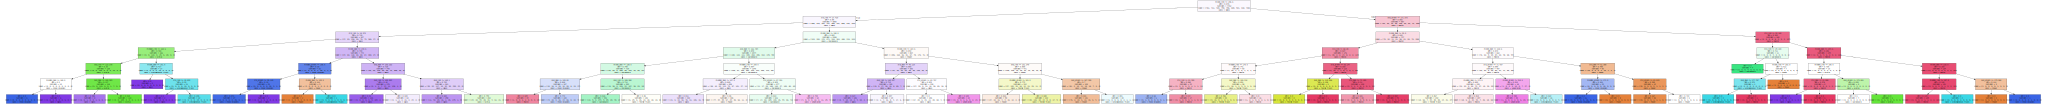

Paper
p 0.7297297297297297
r 0.2076923076923077
f 0.32335329341317365
s 130
Textile Trash
p 0.26
r 0.18840579710144928
f 0.2184873949579832
s 69
Metal
p 0.3925619834710744
r 0.536723163841808
f 0.4534606205250597
s 177
Cardboard
p 0.5128205128205128
r 0.3252032520325203
f 0.3980099502487562
s 123
Miscellaneous Trash
p 0.2727272727272727
r 0.0625
f 0.10169491525423728
s 144
Food Organics
p 0.40625
r 0.47706422018348627
f 0.43881856540084385
s 109
Glass
p 0.56
r 0.5384615384615384
f 0.5490196078431373
s 104
Vegetation
p 0.5342465753424658
r 0.7155963302752294
f 0.611764705882353
s 109
Plastic
p 0.3663101604278075
r 0.6143497757847534
f 0.45896147403685095
s 223


In [18]:
df1 = pd.read_csv("img_data_raw.csv")
max_depth = 6

feature_cols = ['avg_red', 'std_red',
       'median_red', 'mode_red', 'avg_green', 'std_green', 'median_green',
       'mode_green', 'avg_blue', 'std_blue', 'median_blue', 'mode_blue']

X = df1[feature_cols]
y = df1["category"]

class_names = df1['category'].unique()

display(class_names)

# fit a classification tree with max_depth=3 on all data
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
treeclf = DecisionTreeClassifier(max_depth=max_depth, random_state=1)
treeclf.fit(X.values, y)

# # create a Graphviz file
with open("df1.dot", 'w') as f:
    f = export_graphviz(treeclf, out_file=f, feature_names=feature_cols, class_names=class_names, filled = True)

dot = tree.export_graphviz(treeclf, out_file=None, feature_names=feature_cols, class_names=class_names, filled = True)

# dot = tree.export_graphviz(treeclf, out_file=None,
                                    # feature_names=feature_cols,
                                    # class_names=['0', '1'], filled = True))
                                    # class_names=['0', '1', '2', '3', '4'], filled = True)

# output dot code to copy/paste into https://dreampuf.github.io/GraphvizOnline
# print(dot)

# display the graph here
graph = Source(dot)
svg = SVG(graph.pipe(format='svg'))
display(svg)


# now do train/test split

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support

X_train, X_test, y_train, y_test = train_test_split(df1[feature_cols].values, df1['category'],
                                                    test_size=0.25)
treeclf.fit(X_train, y_train)
y_pred = treeclf.predict(X_test)
p,r,f,s = precision_recall_fscore_support(y_test, y_pred, labels=class_names)

for i in range(len(class_names)):
    print(class_names[i])

    print("p", p[i])
    print("r", r[i])
    print("f", f[i])
    print("s", s[i])



array(['Paper', 'Textile Trash', 'Metal', 'Cardboard',
       'Miscellaneous Trash', 'Food Organics', 'Glass', 'Vegetation',
       'Plastic'], dtype=object)

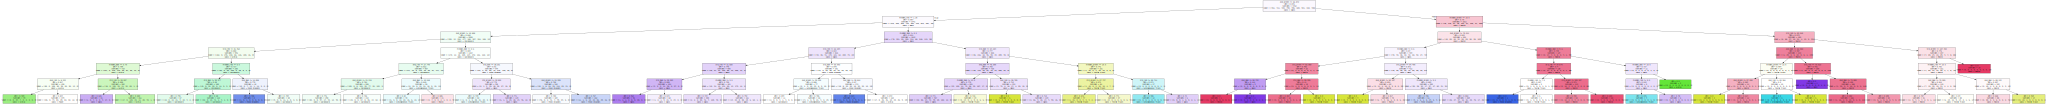

Paper
p 0.22115384615384615
r 0.20909090909090908
f 0.21495327102803735
s 110
Textile Trash
p 0.5384615384615384
r 0.07608695652173914
f 0.13333333333333333
s 92
Metal
p 0.29739776951672864
r 0.42780748663101603
f 0.3508771929824562
s 187
Cardboard
p 0.07692307692307693
r 0.008403361344537815
f 0.01515151515151515
s 119
Miscellaneous Trash
p 0.25925925925925924
r 0.05426356589147287
f 0.08974358974358974
s 129
Food Organics
p 0.3333333333333333
r 0.2184873949579832
f 0.2639593908629441
s 119
Glass
p 0.59375
r 0.3584905660377358
f 0.4470588235294118
s 106
Vegetation
p 0.5401459854014599
r 0.6548672566371682
f 0.592
s 113
Plastic
p 0.3146997929606625
r 0.7136150234741784
f 0.43678160919540227
s 213


In [19]:
df1 = pd.read_csv("img_data_edges.csv")
max_depth = 6

feature_cols = ['avg_red', 'std_red',
       'median_red', 'mode_red', 'avg_green', 'std_green', 'median_green',
       'mode_green', 'avg_blue', 'std_blue', 'median_blue', 'mode_blue']

X = df1[feature_cols]
y = df1["category"]

class_names = df1['category'].unique()

display(class_names)

# fit a classification tree with max_depth=3 on all data
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
treeclf = DecisionTreeClassifier(max_depth=max_depth, random_state=1)
treeclf.fit(X.values, y)

# # create a Graphviz file
with open("df1.dot", 'w') as f:
    f = export_graphviz(treeclf, out_file=f, feature_names=feature_cols, class_names=class_names, filled = True)

dot = tree.export_graphviz(treeclf, out_file=None, feature_names=feature_cols, class_names=class_names, filled = True)

# dot = tree.export_graphviz(treeclf, out_file=None,
                                    # feature_names=feature_cols,
                                    # class_names=['0', '1'], filled = True))
                                    # class_names=['0', '1', '2', '3', '4'], filled = True)

# output dot code to copy/paste into https://dreampuf.github.io/GraphvizOnline
# print(dot)

# display the graph here
graph = Source(dot)
svg = SVG(graph.pipe(format='svg'))
display(svg)



# now do train/test split

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support

X_train, X_test, y_train, y_test = train_test_split(df1[feature_cols].values, df1['category'],
                                                    test_size=0.25)
treeclf.fit(X_train, y_train)
y_pred = treeclf.predict(X_test)
p,r,f,s = precision_recall_fscore_support(y_test, y_pred, labels=class_names)

for i in range(len(class_names)):
    print(class_names[i])

    print("p", p[i])
    print("r", r[i])
    print("f", f[i])
    print("s", s[i])

